In [1]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import operator
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
class KNN:
    def __init__(self, metric='euclidean', k=6, p=3):
        self.metric = metric
        self.k=k
        self.p=p
        
    def straightLineDistance(self, row1,row2,length):
        distance=0
        for x in range(length):
            distance = distance+pow((row1[x]-row2[x]),2)
        return math.sqrt(distance)

    def p_root(self, value, root): 
        root_value = 1 / float(root) 
        return round (float(value) ** float(root_value), 3) 
  
    def minkowski_distance(self, x, y):   
        return (self.p_root(sum(pow(abs(a-b), self.p) for a, b in zip(x, y)), self.p))
    
    def manhattan_distance(self, x, y, n):
        sum = 0
        for i in range(n): 
            for j in range(i+1,n): 
                sum += (abs(x[i] - x[j]) + abs(y[i] - y[j])) 
        return sum
    
    def closestNeighbour(self, trainSet, testCase, k):
        distance=[]
        length = len(testCase)
        for x in range(len(trainSet)):
            if self.metric == 'euclidean':
                dist = self.straightLineDistance(testCase,trainSet[x], length)
            elif self.metric == 'minkowski':
                dist = self.minkowski_distance(testCase,trainSet[x])
            elif self.metric == 'manhattan':
                dist = self.manhattan_distance(testCase,trainSet[x], length)
            distance.append((trainSet[x],dist))
        distance.sort(key=operator.itemgetter(1))
        neighbour=[]
        for x in range(k):
            neighbour.append(distance[x][0])
        return neighbour
    
    def getResponse(self, neighbour):
        highestClass={}
        for x in range(len(neighbour)):
            labels=neighbour[x][-1]
            if labels in highestClass:
                highestClass[labels]= highestClass[labels]+1
            else:
                highestClass[labels]=1
        #sorting the nearest neighbours in descending order
        sortedLabels=sorted(highestClass.items(), key=operator.itemgetter(1), reverse=True)
        #returning the label which is most similar
        return sortedLabels[0][0]
    
    def knn(self, trainset_List, testset_list):
        predictions = []
        self.trainset_List = trainset_List
        self.testset_list = testset_list
        for x in range(len(trainset_List)):
            neighbors = self.closestNeighbour(trainset_List, testset_list[x], self.k)
            output = self.getResponse(neighbors)
            predictions.append(output)
#         return predictions
            print("predicted = ",output," expected = ",testset_list[x][-1])
        accepted=0;
        for x in range(len(testset_list)):
            if (testset_list[x][-1] ==  predictions[x]):
                accepted=accepted+1
        print("number of predictions which are correct :",accepted)
        accuracy= (accepted/float(len(testset_list))) * 100.0
        print("accuracy is ",accuracy)
        
    def check_best_k(self):
        arr = list()
        for k in range(1,16):
            predictions = []
            for x in range(len(trainset_List)):
                neighbors = self.closestNeighbour(trainset_List, testset_list[x], k)
                output = self.getResponse(neighbors)
                predictions.append(output)
    
            accepted = 0;
            for y in range(len(testset_list)):
                if (testset_list[y][-1] ==  predictions[y]):
                    accepted = accepted + 1
        
            accuracy = (accepted / float(len(testset_list))) * 100.0
            print("accuracy when k =",k,"is ",accuracy)
            arr.append(accuracy)
        print("Best k is :",arr.index(max(arr)) + 1)
        return arr
    
    

# Shuffling and splitting the dataset into test and train data 

In [3]:
df = pd.read_csv('diabetes.csv')
print("the diabetes dataset used consists of ",df.shape," number of rows and columns")

shuffle_df = df.sample(frac=1,random_state=10)
train_size=int(0.5*len(df))
print("After splitting the dataset: ")

train_set=shuffle_df[:train_size]
test_set=shuffle_df[train_size:]
print("training set :",len(train_set)," rows")
print("testing set :",len(test_set)," rows")

trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()

the diabetes dataset used consists of  (768, 9)  number of rows and columns
After splitting the dataset: 
training set : 384  rows
testing set : 384  rows


# Predicting without Pre-Processing the dataset, using euclidean distance measure and k=6

In [4]:
model = KNN()
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0

In [5]:
arr = model.check_best_k()

accuracy when k = 1 is  63.28125
accuracy when k = 2 is  63.28125
accuracy when k = 3 is  67.44791666666666
accuracy when k = 4 is  67.1875
accuracy when k = 5 is  69.01041666666666
accuracy when k = 6 is  69.53125
accuracy when k = 7 is  70.57291666666666
accuracy when k = 8 is  70.83333333333334
accuracy when k = 9 is  69.53125
accuracy when k = 10 is  69.27083333333334
accuracy when k = 11 is  69.27083333333334
accuracy when k = 12 is  70.05208333333334
accuracy when k = 13 is  70.3125
accuracy when k = 14 is  70.05208333333334
accuracy when k = 15 is  70.3125
Best k is : 8


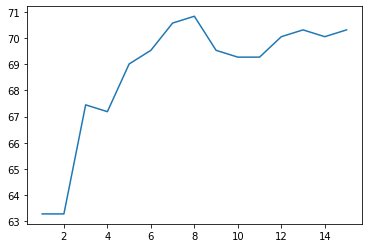

In [6]:
k_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure()
plt.plot(k_arr, arr)

# Pre-Processing the dataset using standard scalar

In [7]:
df = pd.read_csv('diabetes.csv')
column_names = list(df.columns)
del column_names[-1]
print("Data without Pre-Processing\n")
print(df)
print("\n")


std = StandardScaler()
standard = std.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
standardDf = pd.DataFrame(standard, columns = column_names)
standardDf['Outcome'] = df['Outcome'].values
df = standardDf
df['Pregnancies'] = df['Pregnancies'].abs()
df['Glucose'] = df['Glucose'].abs()
df['BloodPressure'] = df['BloodPressure'].abs()
df['SkinThickness'] = df['SkinThickness'].abs()
df['Insulin'] = df['Insulin'].abs()
df['BMI'] = df['BMI'].abs()
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].abs()
df['Age'] = df['Age'].abs()

print("after using standard scalar and converting the negatives to absolute values\n")

print(df)

Data without Pre-Processing

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148           72.0           35.0      0.0  33.6   
1            1.0       85           66.0           29.0      0.0  26.6   
2            8.0      183           64.0            0.0      0.0  23.3   
3            1.0       89           66.0           23.0     94.0  28.1   
4            NaN      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0      101           76.0           48.0    180.0  32.9   
764          2.0      122           70.0           27.0      0.0  36.8   
765          5.0      121           72.0           23.0    112.0  26.2   
766          1.0      126           60.0            0.0      0.0  30.1   
767          1.0       93           70.0           31.0      0.0   NaN   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0

In [8]:
#shuffling the dataset
shuffle_df = df.sample(frac=1,random_state=10)
train_size = int(0.5*len(df))
#splitting data into train and test
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()

In [9]:
#predicting using euclidean distance measure and having k=6
model = KNN()
predictions = model.knn(trainset_List, testset_list)


predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1

In [10]:
arr = model.check_best_k()

accuracy when k = 1 is  88.02083333333334
accuracy when k = 2 is  88.02083333333334
accuracy when k = 3 is  87.5
accuracy when k = 4 is  87.76041666666666
accuracy when k = 5 is  86.97916666666666
accuracy when k = 6 is  89.0625
accuracy when k = 7 is  87.23958333333334
accuracy when k = 8 is  86.71875
accuracy when k = 9 is  85.15625
accuracy when k = 10 is  85.41666666666666
accuracy when k = 11 is  85.41666666666666
accuracy when k = 12 is  85.9375
accuracy when k = 13 is  82.55208333333334
accuracy when k = 14 is  84.375
accuracy when k = 15 is  81.77083333333334
Best k is : 6


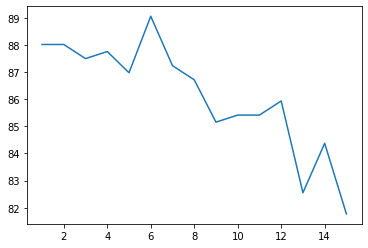

In [11]:
k_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure()
plt.plot(k_arr, arr)

# Normalizing the data after it is Pre-Processed

In [13]:
df = pd.read_csv('diabetes.csv')
column_names = list(df.columns)
del column_names[-1]
std = StandardScaler()
standard = std.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
standardDf=pd.DataFrame(standard,columns=column_names)
standardDf['Pregnancies']=standardDf['Pregnancies'].abs()
standardDf['Glucose']=standardDf['Glucose'].abs()
standardDf['BloodPressure']=standardDf['BloodPressure'].abs()
standardDf['SkinThickness']=standardDf['SkinThickness'].abs()
standardDf['Insulin']=standardDf['Insulin'].abs()
standardDf['BMI']=standardDf['BMI'].abs()
standardDf['DiabetesPedigreeFunction']=standardDf['DiabetesPedigreeFunction'].abs()
standardDf['Age']=standardDf['Age'].abs()
standardDf = standardDf.fillna(0)
normalized_df=preprocessing.normalize(standardDf)
normalized_df=pd.DataFrame(normalized_df,columns=column_names)
normalized_df['Outcome']=df['Outcome'].values
print("Pre-Processed data after normalization\n")
print(normalized_df)
df=normalized_df

Pre-Processed data after normalization

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.292757  0.390085       0.062339       0.415968  0.319231  0.093256   
1       0.459078  0.608186       0.099891       0.285922  0.375847  0.369732   
2       0.407588  0.643826       0.096456       0.427790  0.229954  0.364524   
3       0.426220  0.501732       0.092741       0.076228  0.060623  0.247867   
4       0.000000  0.083799       0.261265       0.150392  0.126697  0.233562   
..           ...       ...            ...            ...       ...       ...   
763     0.474683  0.162005       0.090795       0.447608  0.225353  0.029721   
764     0.453308  0.028461       0.023754       0.331226  0.571099  0.499926   
765     0.296080  0.002877       0.118149       0.132170  0.241098  0.639295   
766     0.390746  0.073630       0.232515       0.595125  0.319904  0.110623   
767     0.461803  0.475442       0.015726       0.355962  0.378078  0.000000   


In [14]:
#shuffling the dataset
shuffle_df = df.sample(frac=1,random_state=10)
train_size = int(0.5*len(df))
#splitting data into train and test
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()

In [15]:
#predicting using euclidean distance measure and having k=6
model = KNN()
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1

In [16]:
arr = model.check_best_k()

accuracy when k = 1 is  100.0
accuracy when k = 2 is  100.0
accuracy when k = 3 is  100.0
accuracy when k = 4 is  100.0
accuracy when k = 5 is  100.0
accuracy when k = 6 is  100.0
accuracy when k = 7 is  100.0
accuracy when k = 8 is  100.0
accuracy when k = 9 is  100.0
accuracy when k = 10 is  100.0
accuracy when k = 11 is  100.0
accuracy when k = 12 is  100.0
accuracy when k = 13 is  100.0
accuracy when k = 14 is  100.0
accuracy when k = 15 is  100.0
Best k is : 1


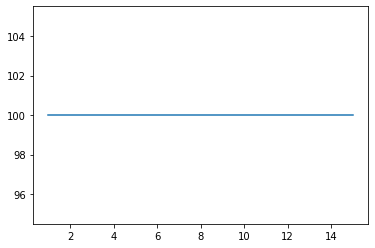

In [17]:
k_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure()
plt.plot(k_arr, arr)

# Changing Parameters(using Pre-Processed and normalized data)

In [18]:
#using manhattan distance instead of euclidean
model = KNN(metric = 'manhattan', k=5, p=2)
predictions = model.knn(trainset_List, testset_list)


predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0

In [19]:
arr = model.check_best_k()

accuracy when k = 1 is  64.84375
accuracy when k = 2 is  64.84375
accuracy when k = 3 is  64.84375
accuracy when k = 4 is  64.84375
accuracy when k = 5 is  64.84375
accuracy when k = 6 is  64.84375
accuracy when k = 7 is  64.84375
accuracy when k = 8 is  64.84375
accuracy when k = 9 is  64.84375
accuracy when k = 10 is  64.84375
accuracy when k = 11 is  64.84375
accuracy when k = 12 is  64.84375
accuracy when k = 13 is  64.84375
accuracy when k = 14 is  64.84375
accuracy when k = 15 is  64.84375
Best k is : 1


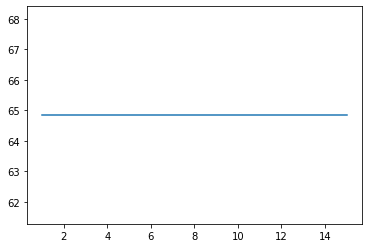

In [20]:
k_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure()
plt.plot(k_arr, arr)

In [21]:
#using manhattan distance instead of euclidean
model = KNN(metric = 'minkowski', k=5, p=2)
predictions = model.knn(trainset_List, testset_list)


predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1

In [22]:
arr = model.check_best_k()

accuracy when k = 1 is  100.0
accuracy when k = 2 is  100.0
accuracy when k = 3 is  100.0
accuracy when k = 4 is  100.0
accuracy when k = 5 is  100.0
accuracy when k = 6 is  100.0
accuracy when k = 7 is  100.0
accuracy when k = 8 is  100.0
accuracy when k = 9 is  100.0
accuracy when k = 10 is  100.0
accuracy when k = 11 is  100.0
accuracy when k = 12 is  100.0
accuracy when k = 13 is  100.0
accuracy when k = 14 is  100.0
accuracy when k = 15 is  100.0
Best k is : 1


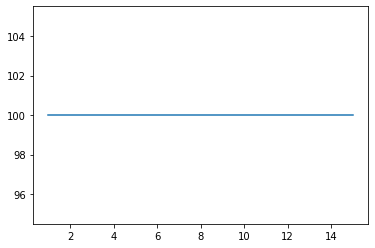

In [23]:
k_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure()
plt.plot(k_arr, arr)